In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()
import pandas as pd
from sklearn.metrics import silhouette_score,silhouette_samples
import matplotlib.cm as cm

# KMeans implementation
- Contains KMeans class that contains the various functions that is used in Kmeans Clustering.

In [39]:
class KMeans:
  def __init__(self):
    pass

  def init_centroids(self,X,num_clusters = 3):
    self.centroids_ = X.copy()
    np.random.shuffle(self.centroids_)
    self.centroids_ = self.centroids_[:num_clusters]
  
  def set_label(self,X):
    # print(self.centroids_)
    distances = np.sqrt(((X-self.centroids_[:,np.newaxis])**2).sum(axis = 2))
    self.labels_ = np.argmin(distances,axis = 0)

  def change_centroid(self,X):
    self.centroids_ = np.array([X[self.labels_ == k].mean(axis = 0) for k in range(self.centroids_.shape[0])])

  def get_sse(self,X):
    d = ((X-self.centroids_[:,np.newaxis])**2).sum(axis = 2)
    l = np.min(d,axis = 0)
    return l.sum()


  def fit(self,X,num_clusters=3):
    self.init_centroids(X,num_clusters)
    copy_centroids_ = np.array([0])
    # print(centroids_)
    # print(copy_centroids_)
    while 1:
      # print(self.centroids_)
      if (self.centroids_ == copy_centroids_).all():
        break
      copy_centroids_ = self.centroids_
      self.set_label(X)
      self.change_centroid(X)

# Reading the data and preprocessing

- Here we preprocess the data provided.
- We use only those attributes having numerical attributes.

In [40]:
data = pd.read_csv('football_data.csv')

In [41]:
data.head()

Unnamed: 0      ID  ... GKReflexes  Release Clause
0           0  158023  ...        8.0         €226.5M
1           1   20801  ...       11.0         €127.1M
2           2  190871  ...       11.0         €228.1M
3           3  193080  ...       94.0         €138.6M
4           4  192985  ...       13.0         €196.4M

[5 rows x 89 columns]

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

In [43]:
data_with_numerical_attributes = data.drop(columns=['ID', 'Name', 'Photo', 'Nationality', 'Flag', 'Club','Club Logo','Value','Wage','Preferred Foot','Work Rate',
                       'Body Type','Real Face','Position','Release Clause', 'Joined', 'Loaned From','Contract Valid Until','Height',
                       'Weight','LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM','LM','LCM','CM','RCM','RM','LWB','LDM','CDM',
                       'RDM','RWB','LB','LCB','CB','RCB','RB'])

In [44]:
data_with_numerical_attributes.head()

Unnamed: 0  Age  Overall  ...  GKKicking  GKPositioning  GKReflexes
0           0   31       94  ...       15.0           14.0         8.0
1           1   33       94  ...       15.0           14.0        11.0
2           2   26       92  ...       15.0           15.0        11.0
3           3   27       91  ...       87.0           88.0        94.0
4           4   27       91  ...        5.0           10.0        13.0

[5 rows x 43 columns]

In [45]:
data_with_numerical_attributes.drop('Unnamed: 0', axis=1, inplace=True)

In [46]:
data_with_numerical_attributes.fillna(0, inplace = True)

In [47]:
data_with_numerical_attributes.columns

Index(['Age', 'Overall', 'Potential', 'Special', 'International Reputation',
       'Weak Foot', 'Skill Moves', 'Jersey Number', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes'],
      dtype='object')

# Without PCA
- In this section we apply Kmeans clustering on original data without PCA.

In [ ]:
X = data_with_numerical_attributes.values
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [ ]:
K = [2,4,6,8,10,13,16,20,30,40,50,60,70,80,90,100]

models = []
sses = []
scores = []
samples = []
distortion = []
for k in K:
  kmeans = KMeans()
  kmeans.fit(X,k)
  sses.append(kmeans.get_sse(X))
  distortion.append(kmeans.get_sse(X)/X.shape[0])
  scores.append(silhouette_score(X,kmeans.labels_))
  samples.append(silhouette_samples(X,kmeans.labels_))
  models.append(kmeans)
  print("For "+str(k)+" SSE = "+str(kmeans.get_sse(X))+" Silhoutte_Score = "+str(silhouette_score(X,kmeans.labels_))+" Avg Distortion = "+str(kmeans.get_sse(X)/X.shape[0]))
  


For 2 SSE = 468785.75741224387 Silhoutte_Score = 0.5139163015852043 Avg Distortion = 25.747556292208703
For 4 SSE = 330984.98477417923 Silhoutte_Score = 0.2153827635020219 Avg Distortion = 18.17899625276977
For 6 SSE = 291107.2668309223 Silhoutte_Score = 0.18397119530357992 Avg Distortion = 15.988755249679919
For 8 SSE = 270801.4208612968 Silhoutte_Score = 0.1440710639609955 Avg Distortion = 14.873478379815282
For 10 SSE = 255968.46893791188 Silhoutte_Score = 0.15541450249774325 Avg Distortion = 14.058794361394622
For 13 SSE = 244011.64268865215 Silhoutte_Score = 0.14273517976572458 Avg Distortion = 13.402078469196033
For 16 SSE = 223780.1665900333 Silhoutte_Score = 0.10521517748509929 Avg Distortion = 12.29088628494718
For 20 SSE = 208867.63797564222 Silhoutte_Score = 0.09820430978966678 Avg Distortion = 11.471831601891703
For 30 SSE = 191937.85586368103 Silhoutte_Score = 0.0937577203596886 Avg Distortion = 10.541981428224366
For 40 SSE = 180199.6207688959 Silhoutte_Score = 0.08019486

## Elbow Method
- For the elbow method we need the Squared Sum of distances of data points from their corresponding centroids and average distortions.
\begin{equation}
SSE = \sum_{i} (x_i-c_i)^2 \\
Avg Distortion = \frac{\sum_{i} (x_i-c_i)^2}{|X|}
\end{equation}

Text(0, 0.5, 'Sum_of_Square_Distances')

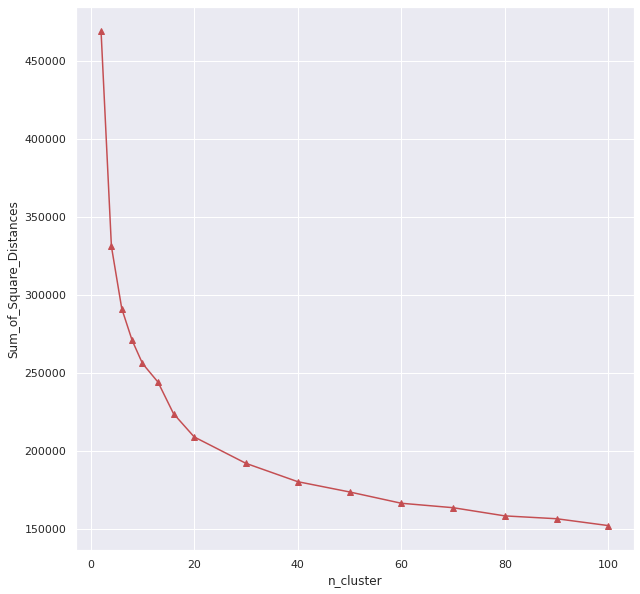

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(K,sses,'r-^')
plt.xlabel('n_cluster')
plt.ylabel('Sum_of_Square_Distances')

Text(0, 0.5, 'Average Distortions')

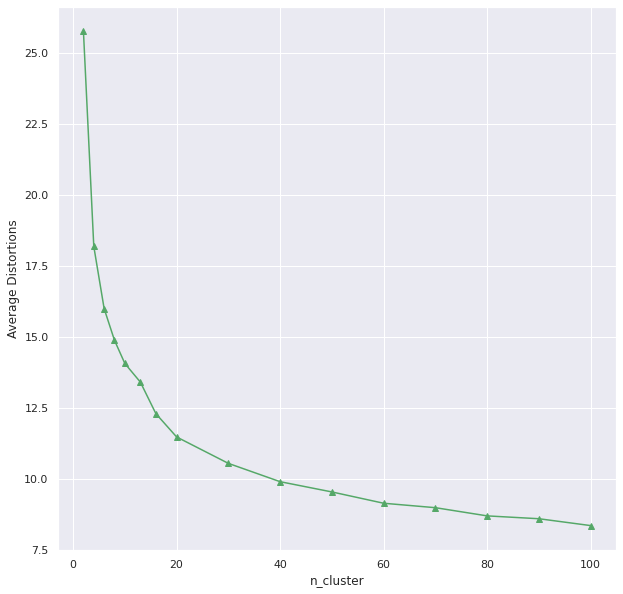

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(K,distortion,'g-^')
plt.xlabel('n_cluster')
plt.ylabel('Average Distortions')

Observations
- From the above plots we can see that the optimal values of cluster size are 20-22.



## Silhouette Score
- Below plots shows the silhouette score plotted for different values for cluster sizes.

Text(0, 0.5, 'Silhoutte Score')

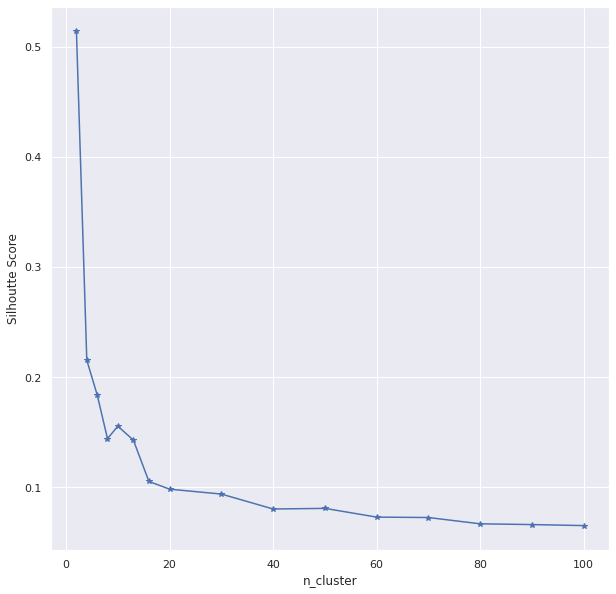

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(K,scores,'b-*')
plt.xlabel('n_cluster')
plt.ylabel('Silhoutte Score')

In [ ]:
def plot_silhoutte(k,j,kmeans_model,score,sample):
  fig, (ax1) = plt.subplots(1, 1)
  fig.set_size_inches(18, 7)
  ax1.set_xlim([-0.1, 1])
  ax1.set_ylim([0, len(X) + (len(K) + 1) * 10])


  y_lower = 10
  for i in range(k):
    ith_val = sample[kmeans_model.labels_ == i]
    ith_val.sort()
    size_cluster_i = ith_val.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / len(K))
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_val,
                      facecolor=color, edgecolor=color, alpha=0.7)

    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    y_lower = y_upper + 10 
  ax1.set_title("The silhouette plot for the various clusters.")
  ax1.set_xlabel("The silhouette coefficient values")
  ax1.set_ylabel("Cluster label")

  ax1.axvline(x=score, color="red", linestyle="--")

  ax1.set_yticks([])
  ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
  plt.show()

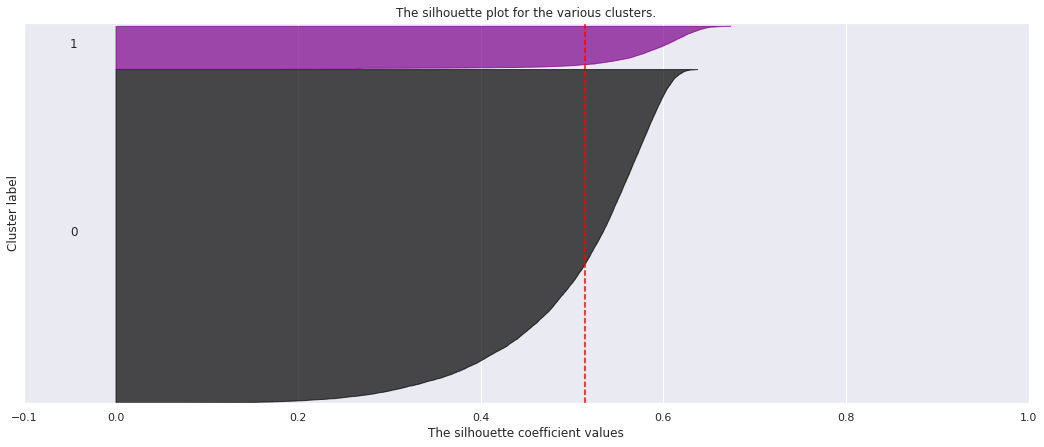

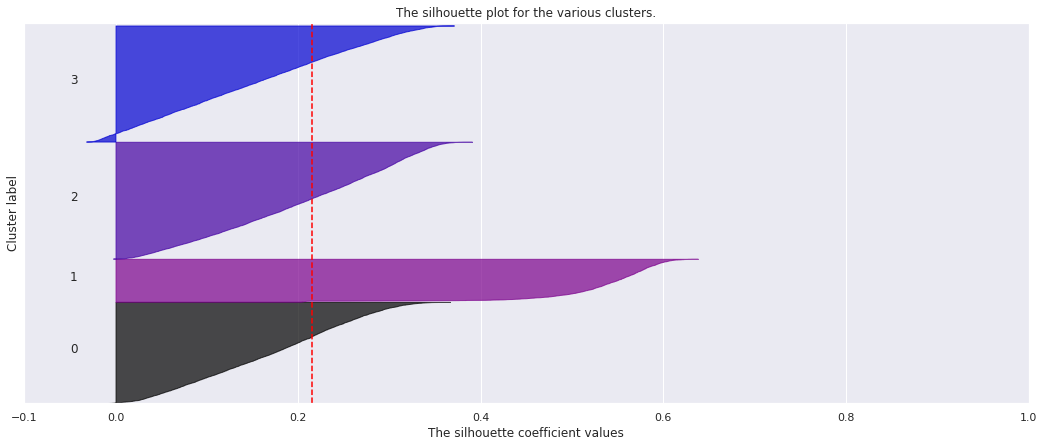

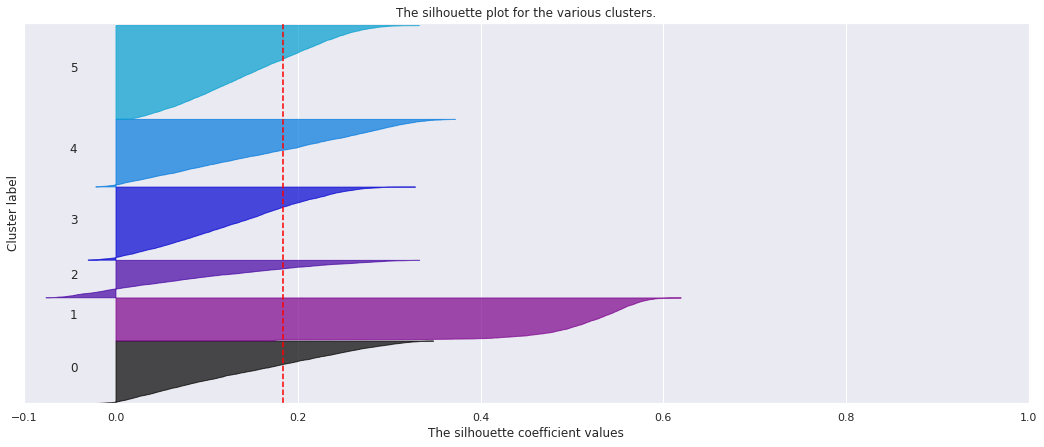

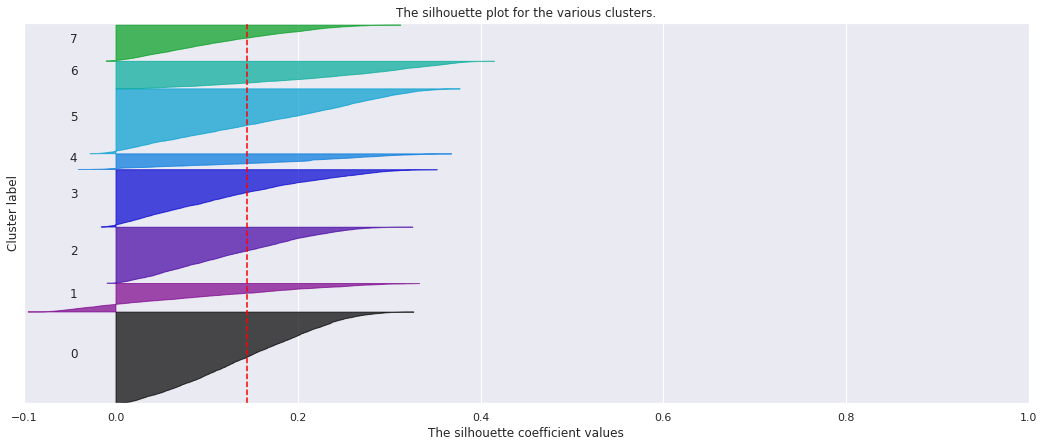

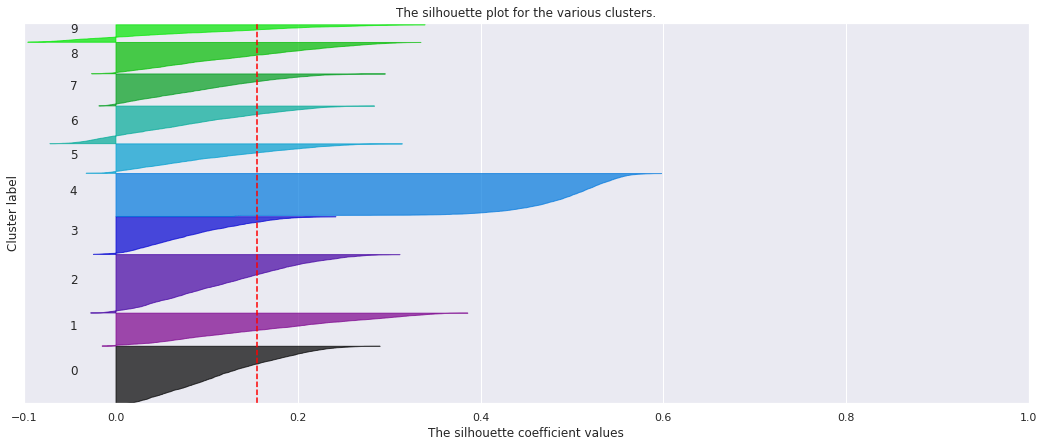

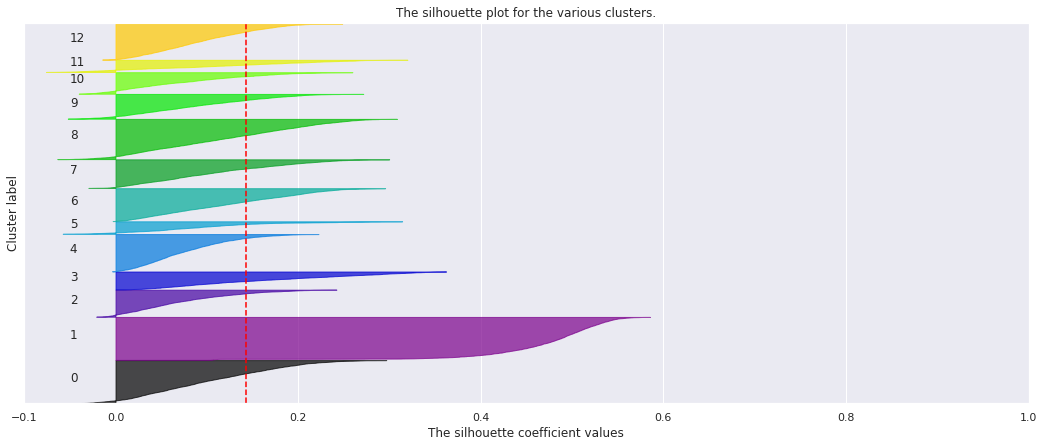

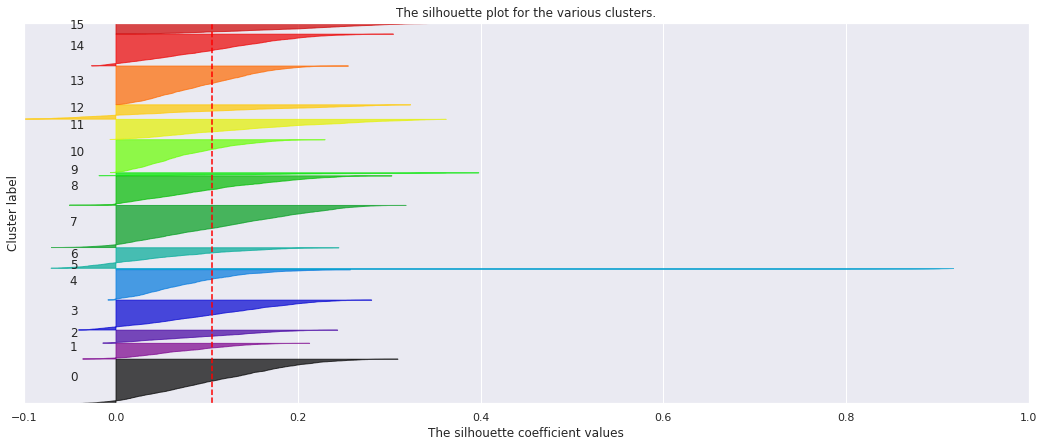

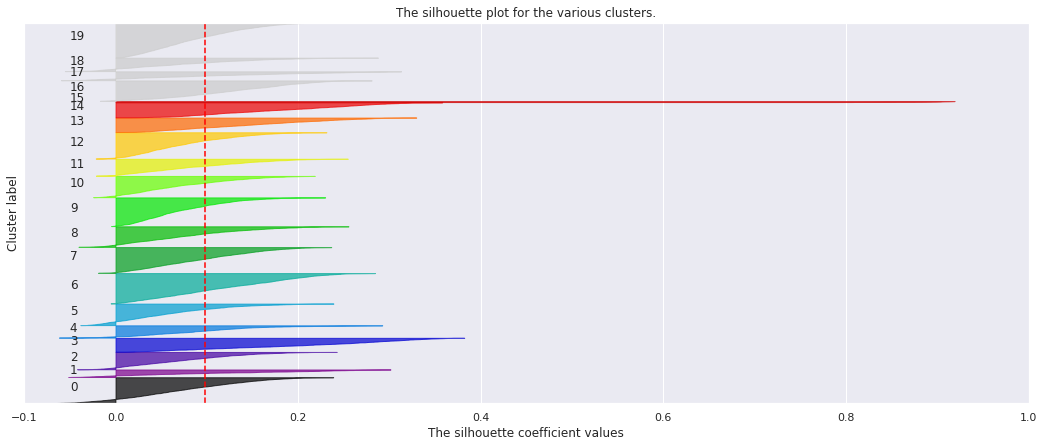

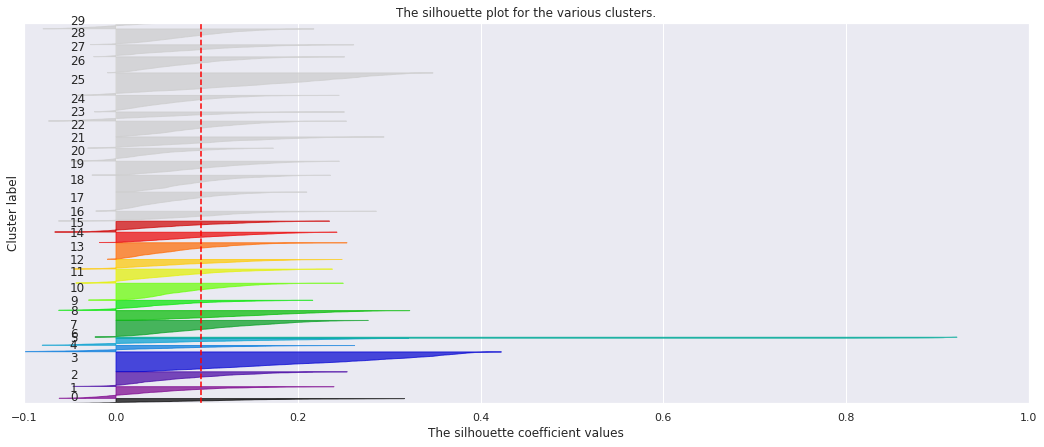

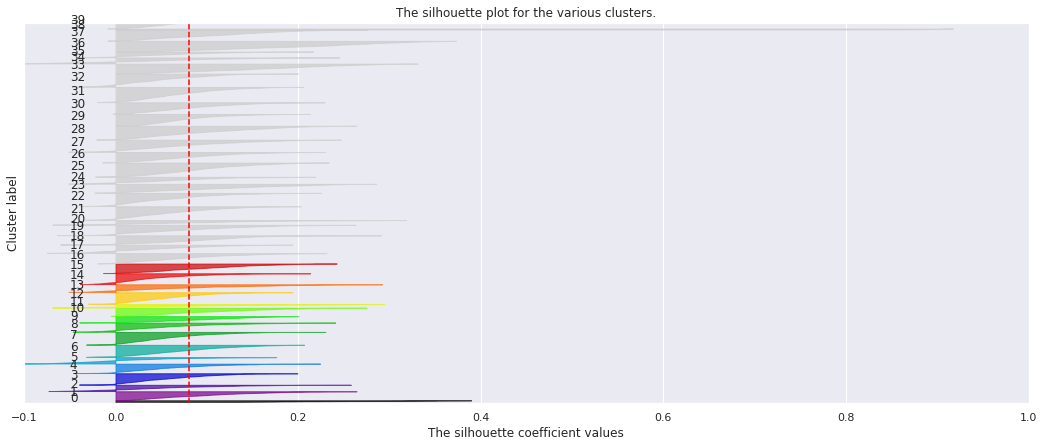

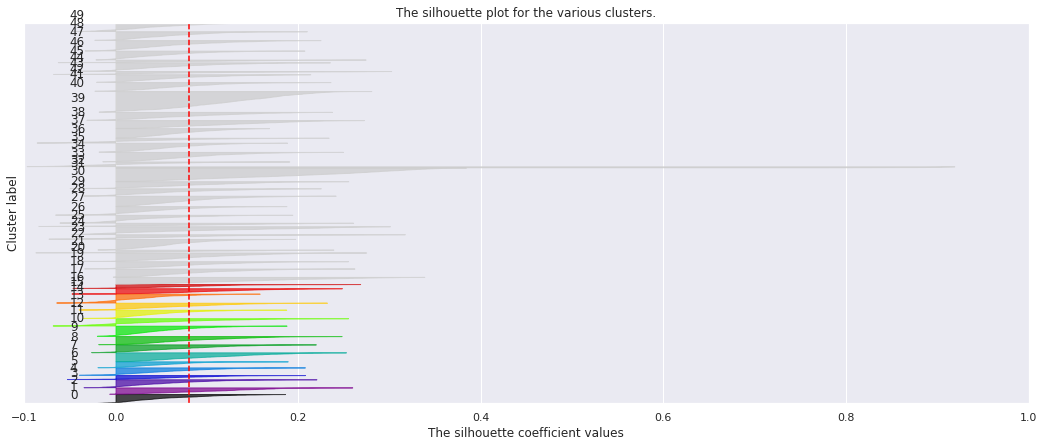

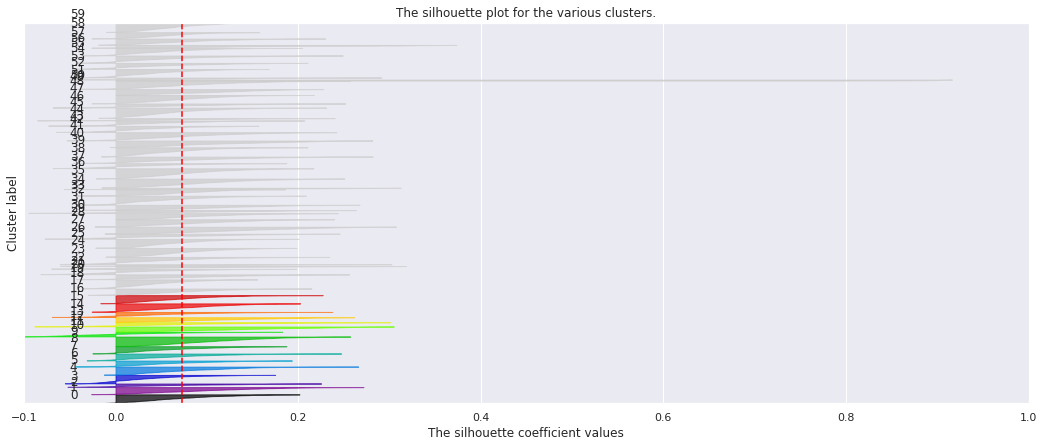

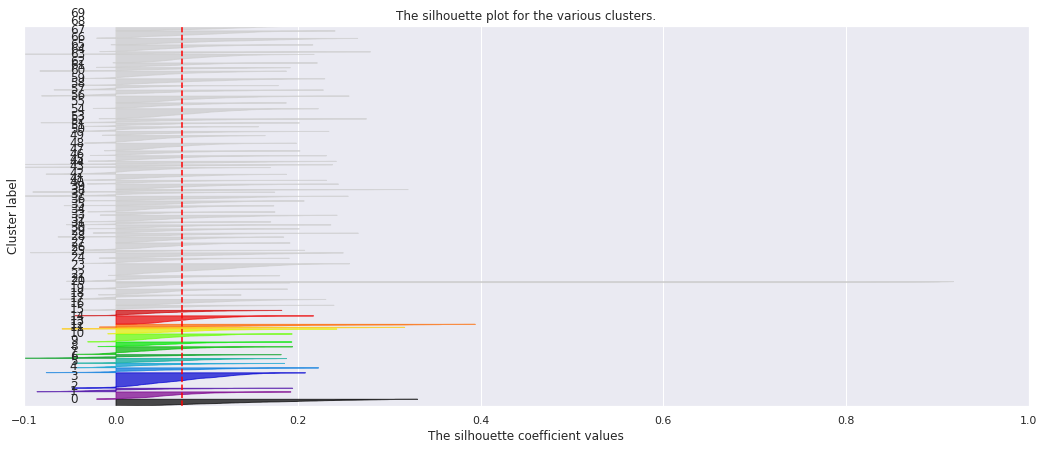

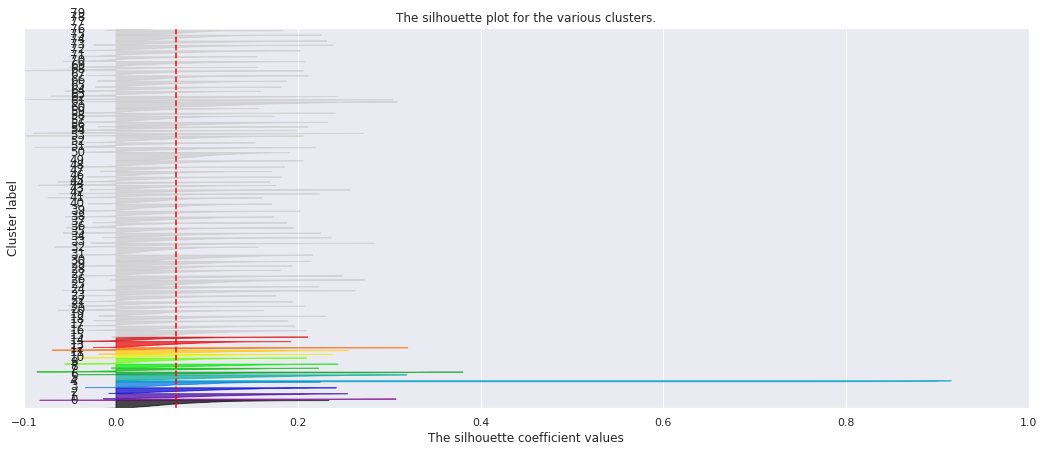

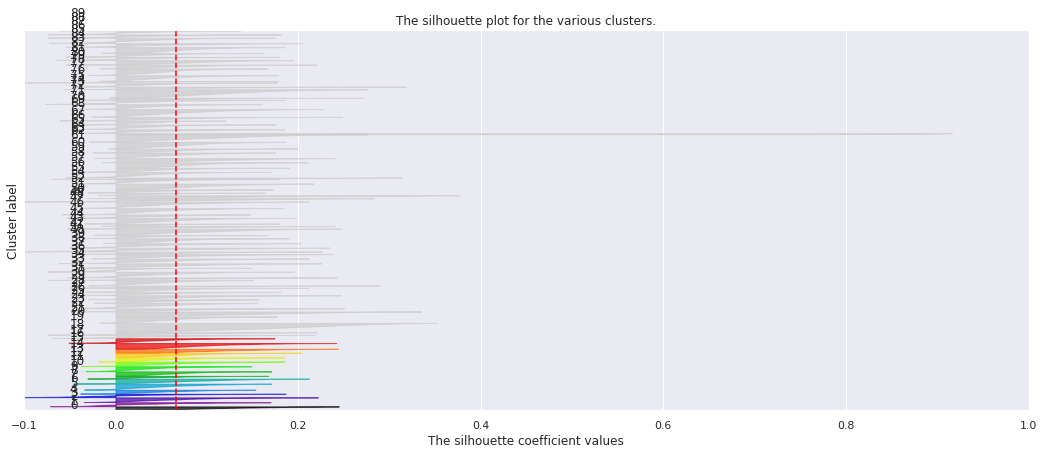

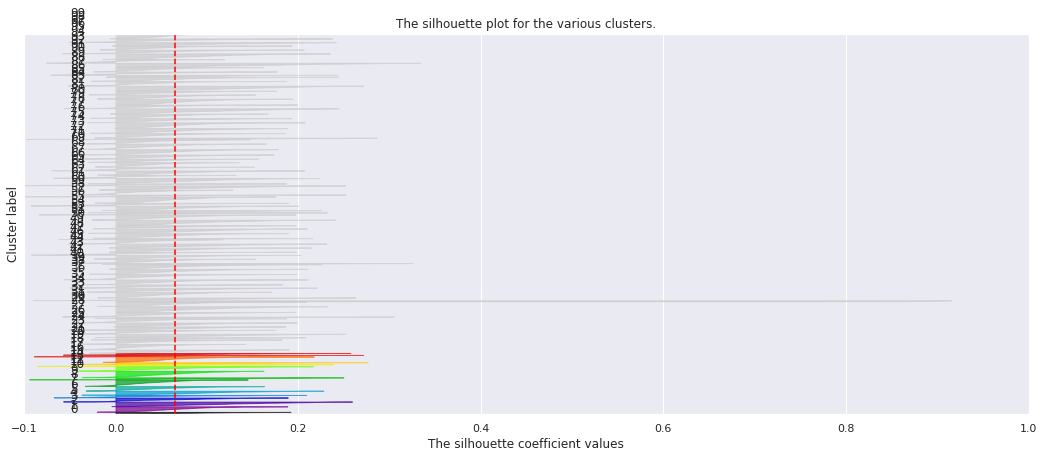

In [ ]:
for i in range(len(K)):
  plot_silhoutte(K[i],i,models[i],scores[i],samples[i])

## We choose our optimal k = 11, as there are 11 players in a team
- In this module we try mark each cluster and would see if there are certain attributes that dominate others. 

In [ ]:
kmeans = KMeans()
kmeans.fit(X,11)

In [ ]:
df = data_with_numerical_attributes
df['labels'] = kmeans.labels_

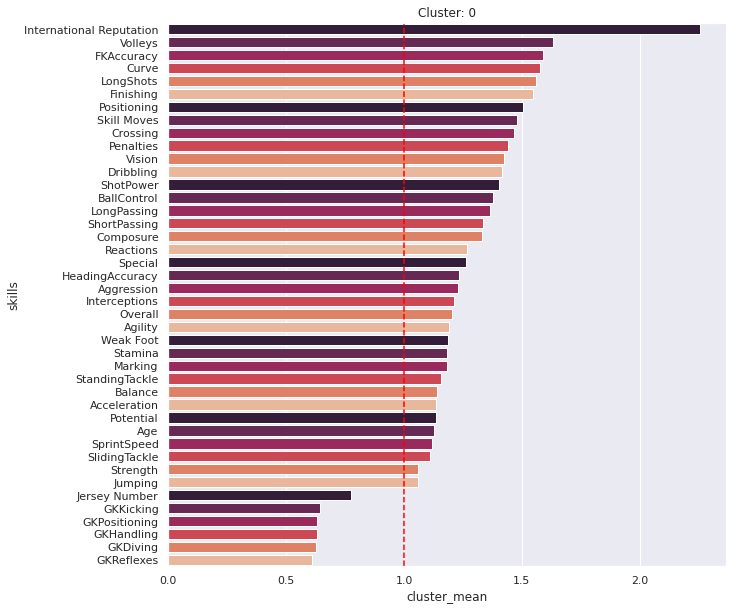

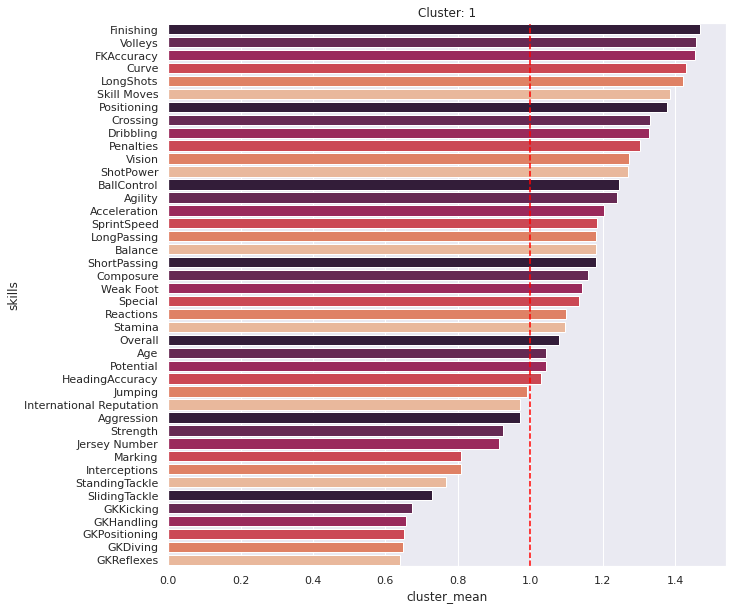

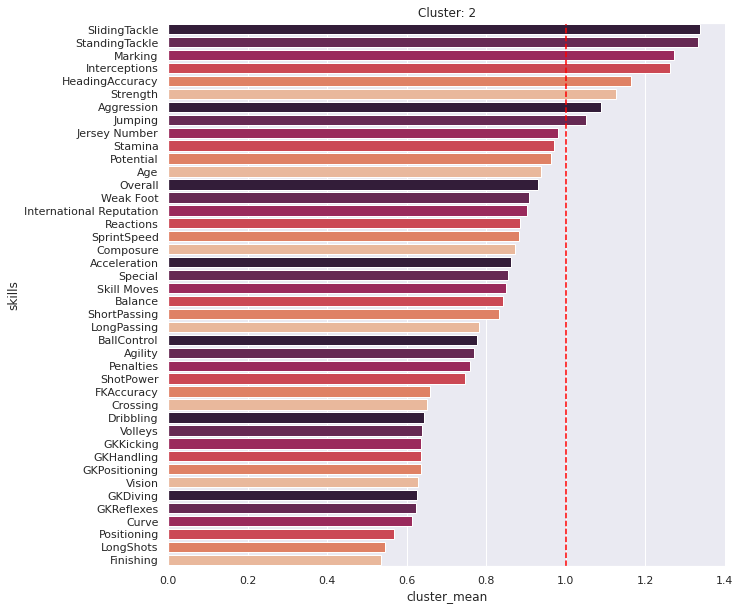

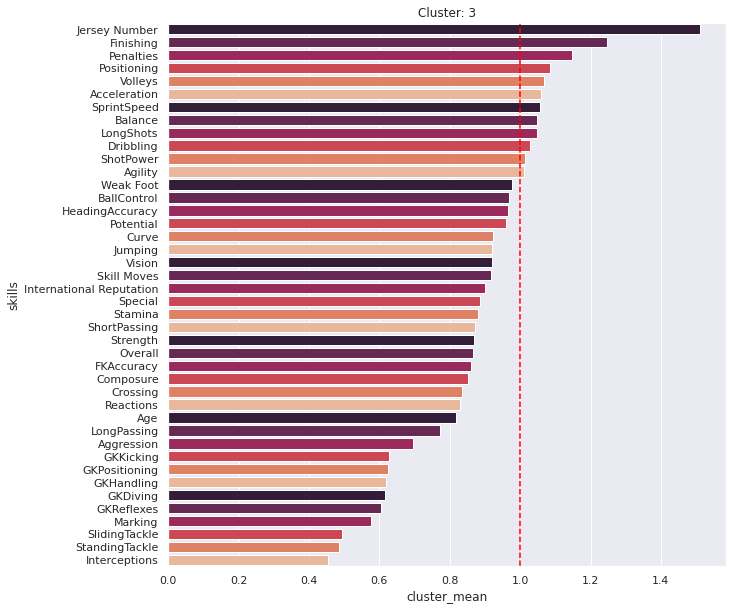

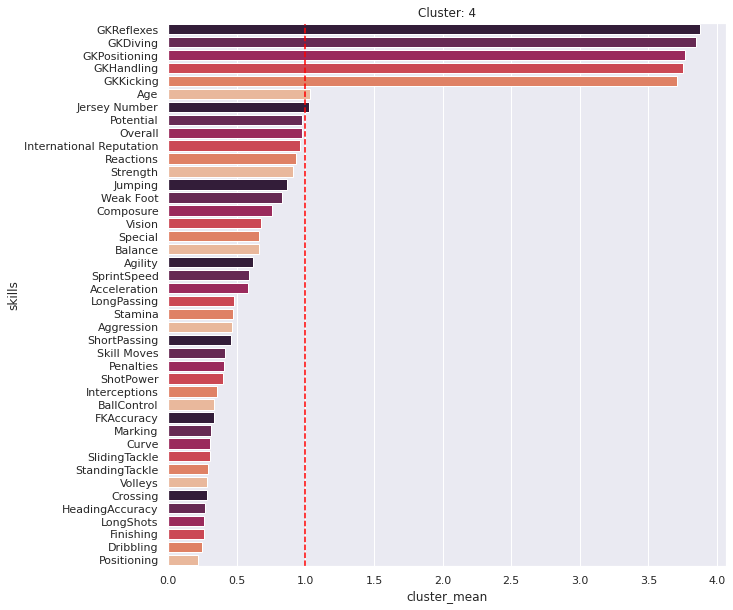

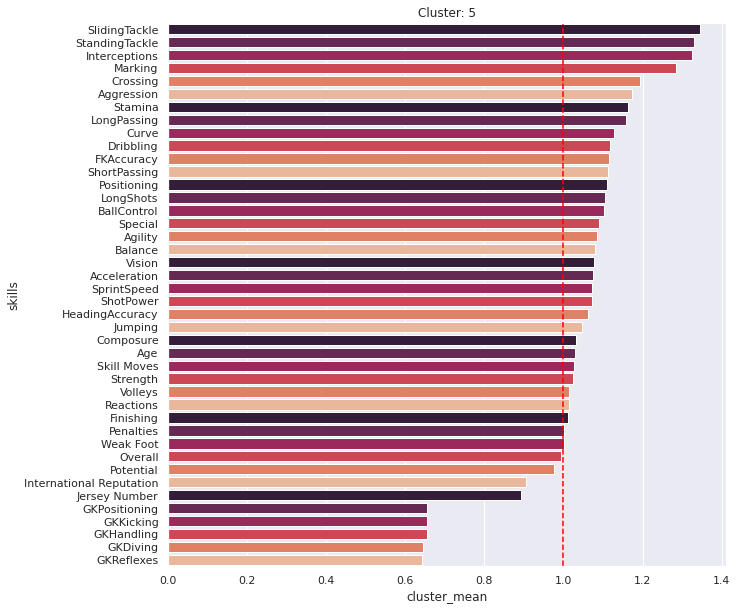

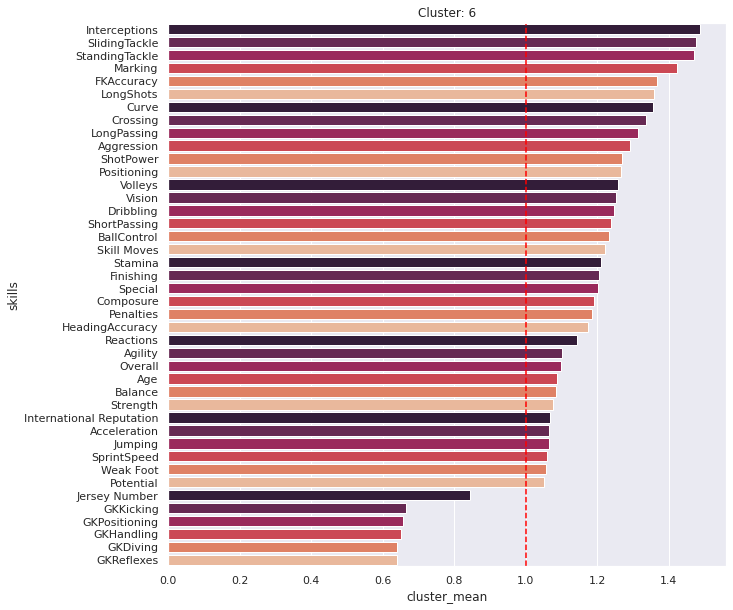

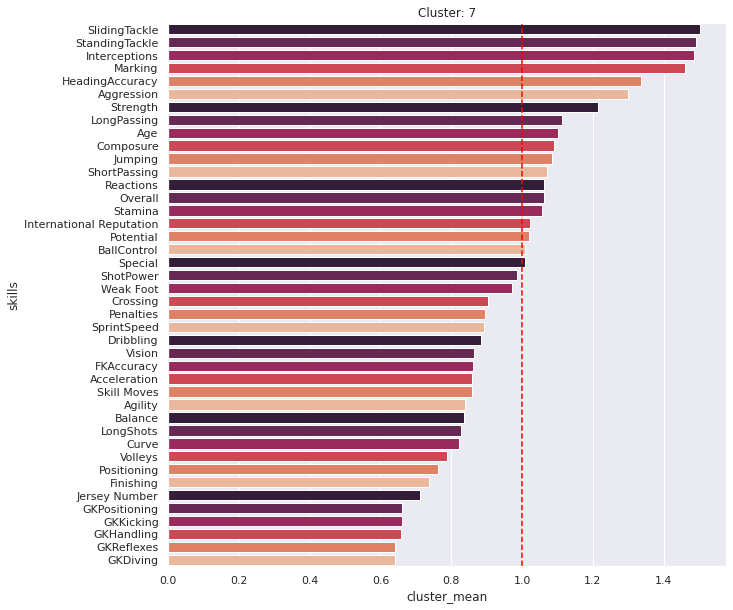

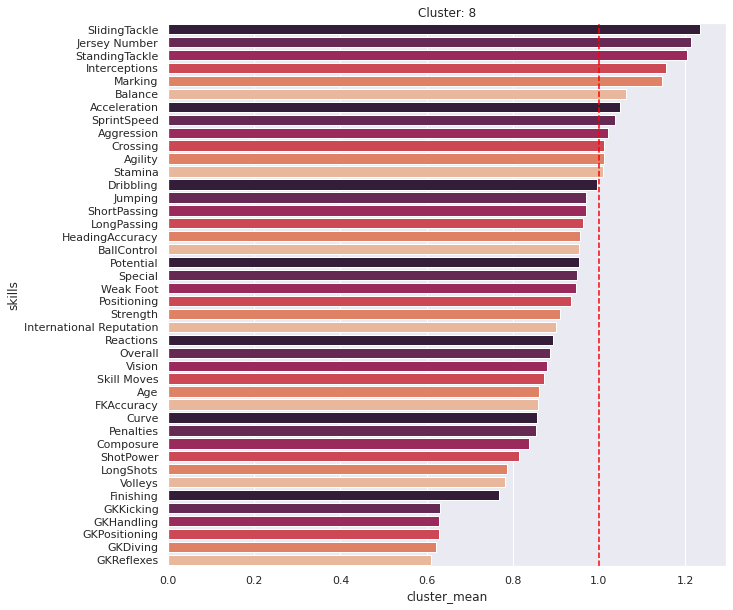

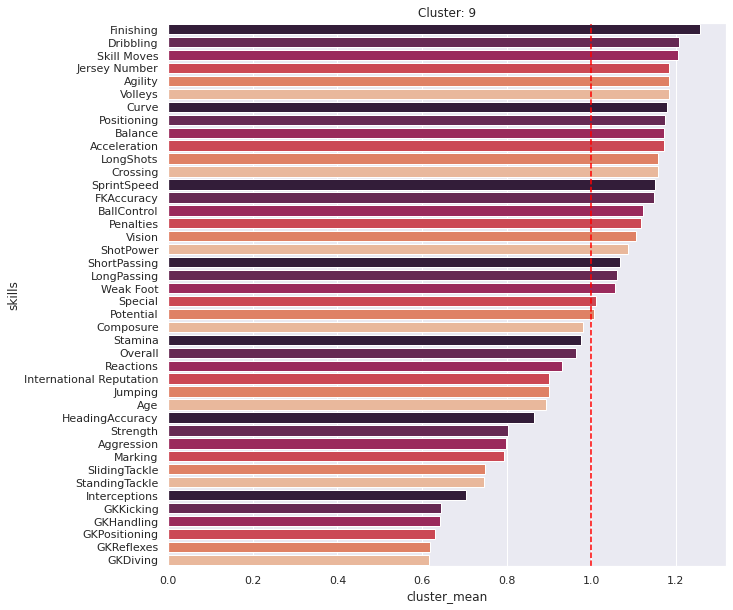

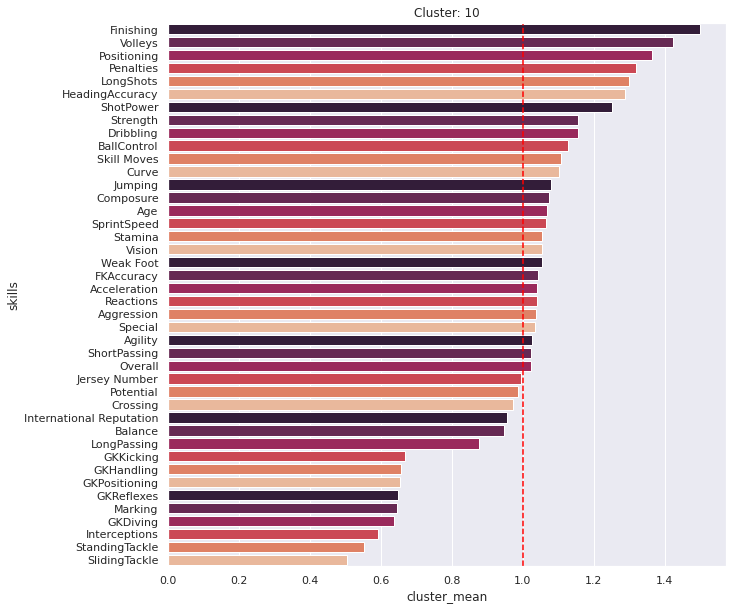

In [ ]:
for label in range(11):
  overall_mean = []
  cluster_mean = []
  for i,skillname in enumerate(df.columns[:-1]):
    mu = df[skillname].mean()
    cluster_mean.append(df[df['labels'] == label][skillname].mean()/mu)
  
  to_plot = pd.DataFrame({'skills':df.columns[:-1],'cluster_mean':cluster_mean})
  to_plot = to_plot.sort_values(by=['cluster_mean'],ascending=False)
  fig,ax = plt.subplots(figsize=(10,10))
  sns.barplot(y='skills', x='cluster_mean', data=to_plot,ax = ax,palette=sns.color_palette("rocket"))
  ax.axvline(x=mu/mu, color="red", linestyle="--")
  plt.title("Cluster: "+str(label))

## Visualization with PCA
- Now we will visualize the clusters using PCA.

### 2D PCA

In [ ]:
from sklearn.decomposition import PCA


X = data_with_numerical_attributes.values
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [ ]:
pca_2d = PCA(n_components=2).fit_transform(X)

<Figure size 432x288 with 0 Axes>

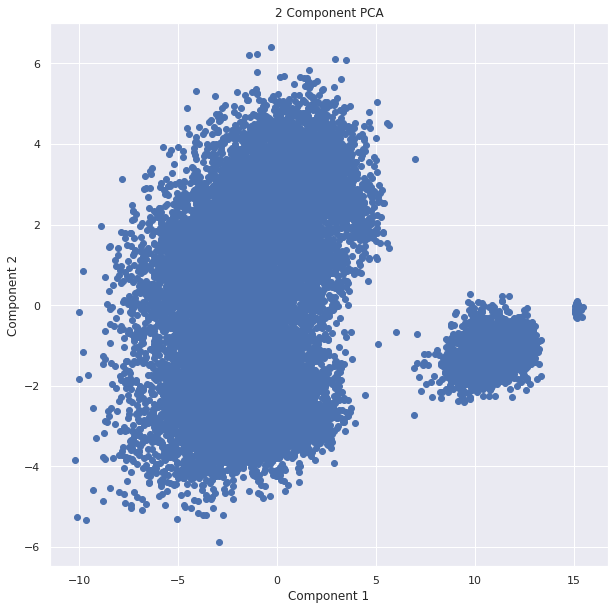

In [ ]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('2 Component PCA')
plt.scatter(pca_2d[:,0], pca_2d[:,1])

In [ ]:
K = [2,4,6,8,10,13,16,20,30,40,50,60,70,80,90,100]
models = []
sses = []
scores = []
samples = []
distortion = []
for k in K:
  kmeans = KMeans()
  kmeans.fit(pca_2d,k)
  sses.append(kmeans.get_sse(pca_2d))
  distortion.append(kmeans.get_sse(pca_2d)/pca_2d.shape[0])
  scores.append(silhouette_score(pca_2d,kmeans.labels_))
  samples.append(silhouette_samples(X,kmeans.labels_))
  models.append(kmeans)
  print("For "+str(k)+" SSE = "+str(kmeans.get_sse(pca_2d))+" Silhoutte_Score = "+str(silhouette_score(pca_2d,kmeans.labels_))+" Avg Distortion = "+str(kmeans.get_sse(pca_2d)/pca_2d.shape[0]))
  

For 2 SSE = 189646.52274763765 Silhoutte_Score = 0.6723335739604005 Avg Distortion = 10.416132407735358
For 4 SSE = 74263.88176992277 Silhoutte_Score = 0.4400525093900873 Avg Distortion = 4.078864270331343
For 6 SSE = 45150.490854363474 Silhoutte_Score = 0.4228830861544932 Avg Distortion = 2.479842415244877
For 8 SSE = 34669.77486266979 Silhoutte_Score = 0.40290725229101265 Avg Distortion = 1.9042003000312948
For 10 SSE = 29788.45224896205 Silhoutte_Score = 0.3484966872235522 Avg Distortion = 1.636098876748616
For 13 SSE = 21929.10200505417 Silhoutte_Score = 0.35319947186772066 Avg Distortion = 1.2044324713052217
For 16 SSE = 18910.446433513123 Silhoutte_Score = 0.33402524684279317 Avg Distortion = 1.0386360429237724
For 20 SSE = 15155.311943214578 Silhoutte_Score = 0.33336582274263454 Avg Distortion = 0.832389297699488
For 30 SSE = 10250.259992262116 Silhoutte_Score = 0.3302395736369582 Avg Distortion = 0.5629845659505748
For 40 SSE = 7590.332335755154 Silhoutte_Score = 0.328997399949

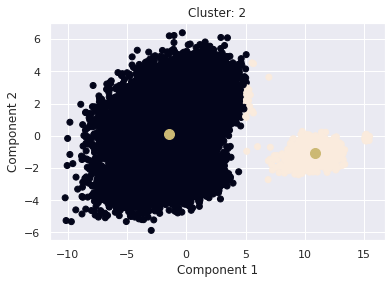

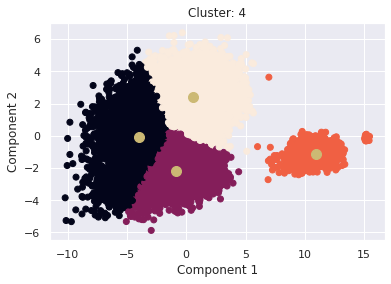

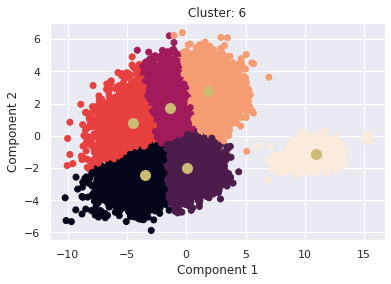

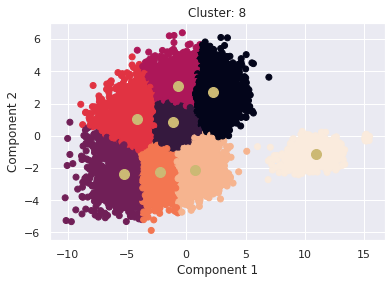

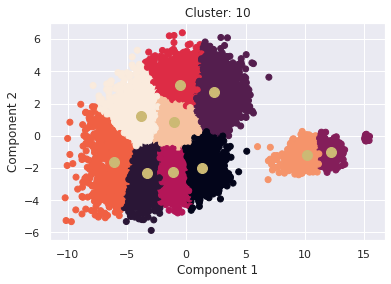

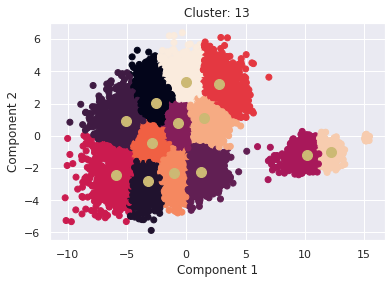

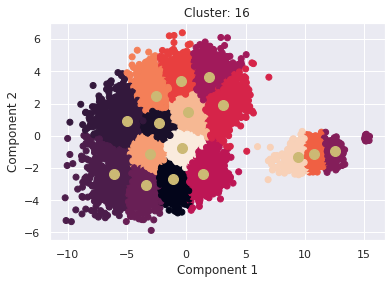

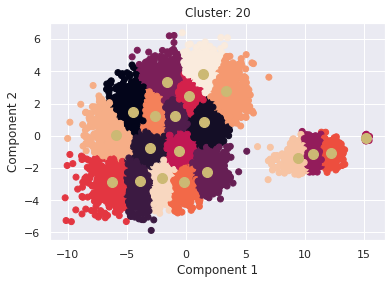

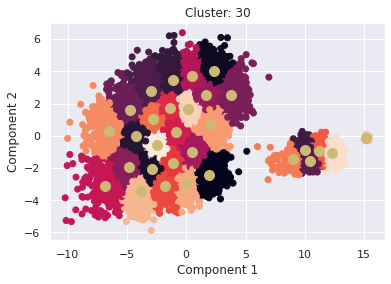

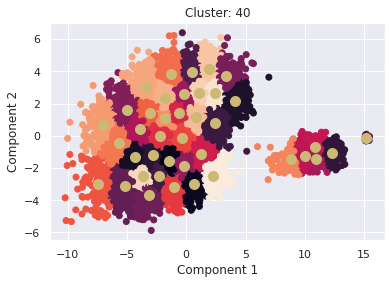

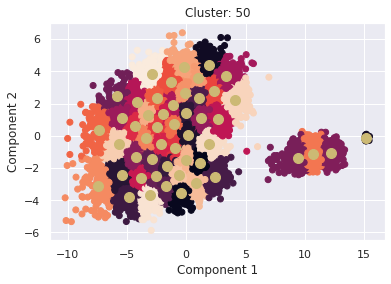

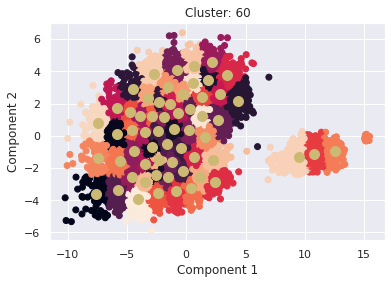

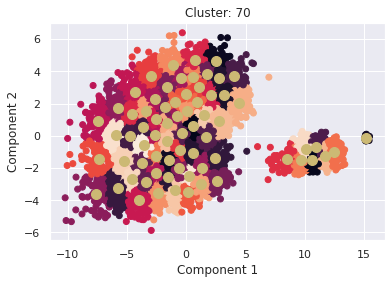

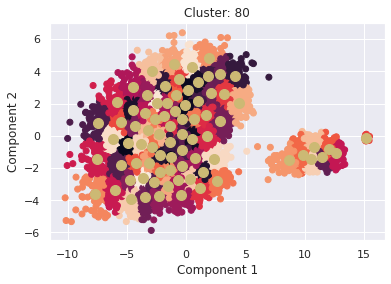

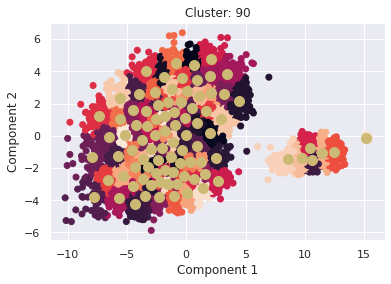

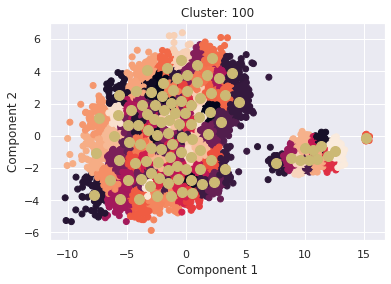

In [ ]:
for j in range(len(K)):
  plt.figure()
  colors = [int(i) for i in models[j].labels_]
  plt.scatter(pca_2d[:, 0], pca_2d[:, 1], c = colors)
  plt.scatter(models[j].centroids_[:, 0], models[j].centroids_[:, 1], c='y', s=100)
  plt.xlabel('Component 1')
  plt.ylabel('Component 2')
  plt.title('Cluster: '+str(K[j]))
  plt.show()

### 3D PCA

In [ ]:
from sklearn.decomposition import PCA


X = data_with_numerical_attributes.values
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [ ]:
pca_3d = PCA(n_components=3).fit_transform(X)

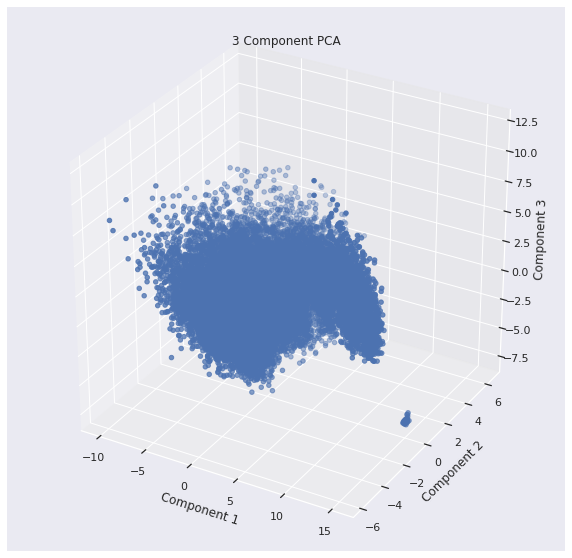

In [ ]:
ax = plt.figure(figsize=(10,10)).gca(projection = '3d')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
plt.title('3 Component PCA')
ax.scatter(pca_3d[:,0], pca_3d[:,1],pca_3d[:,2])

In [ ]:
K = [2,4,6,8,10,13,16,20,30,40,50,60,70,80,90,100]
models = []
sses = []
scores = []
samples = []
distortion = []
for k in K:
  kmeans = KMeans()
  kmeans.fit(pca_3d,k)
  sses.append(kmeans.get_sse(pca_3d))
  distortion.append(kmeans.get_sse(pca_3d)/pca_3d.shape[0])
  scores.append(silhouette_score(pca_3d,kmeans.labels_))
  samples.append(silhouette_samples(X,kmeans.labels_))
  models.append(kmeans)
  print("For "+str(k)+" SSE = "+str(kmeans.get_sse(pca_3d))+" Silhoutte_Score = "+str(silhouette_score(pca_3d,kmeans.labels_))+" Avg Distortion = "+str(kmeans.get_sse(pca_3d)/pca_3d.shape[0]))
  

For 2 SSE = 251334.16342173374 Silhoutte_Score = 0.6451945699083049 Avg Distortion = 13.804260087973512
For 4 SSE = 114540.1396165635 Silhoutte_Score = 0.3980632809602147 Avg Distortion = 6.290994651318916
For 6 SSE = 79702.2161726186 Silhoutte_Score = 0.3771028408826204 Avg Distortion = 4.37755897032013
For 8 SSE = 63964.93162325001 Silhoutte_Score = 0.37132035016812187 Avg Distortion = 3.5132054497308736
For 10 SSE = 54872.754925548084 Silhoutte_Score = 0.36005776183159827 Avg Distortion = 3.013827369997698
For 13 SSE = 46923.03570530281 Silhoutte_Score = 0.3484656152464814 Avg Distortion = 2.5771975451915643
For 16 SSE = 34553.768940664464 Silhoutte_Score = 0.3152055127072325 Avg Distortion = 1.897828798850138
For 20 SSE = 28870.388056275104 Silhoutte_Score = 0.2980942995451617 Avg Distortion = 1.5856751829667217
For 30 SSE = 19488.335812835056 Silhoutte_Score = 0.28352975468035985 Avg Distortion = 1.070375998947386
For 40 SSE = 18977.404575018172 Silhoutte_Score = 0.278022413626882

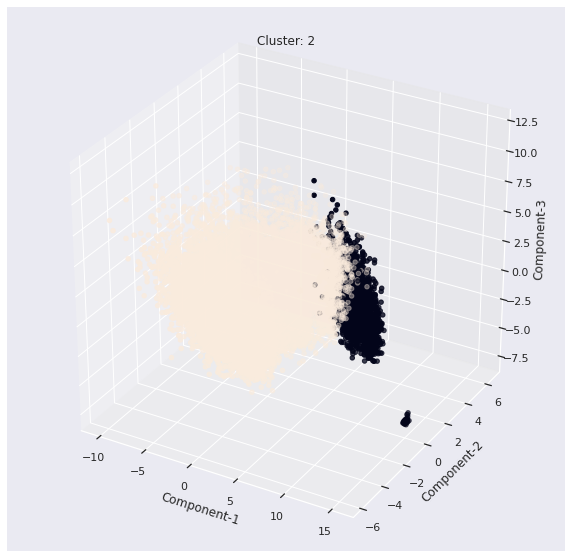

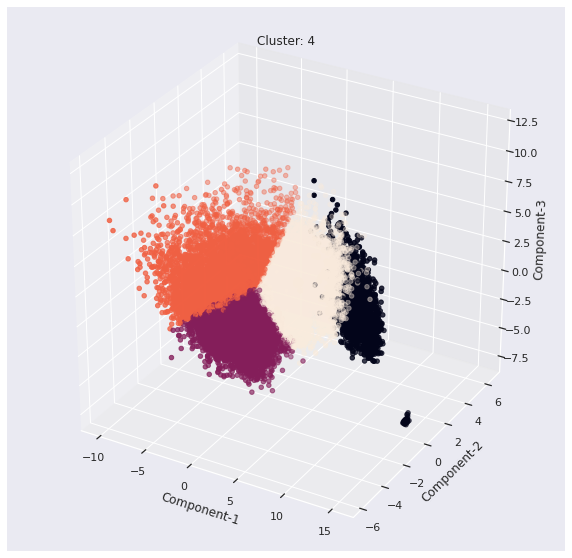

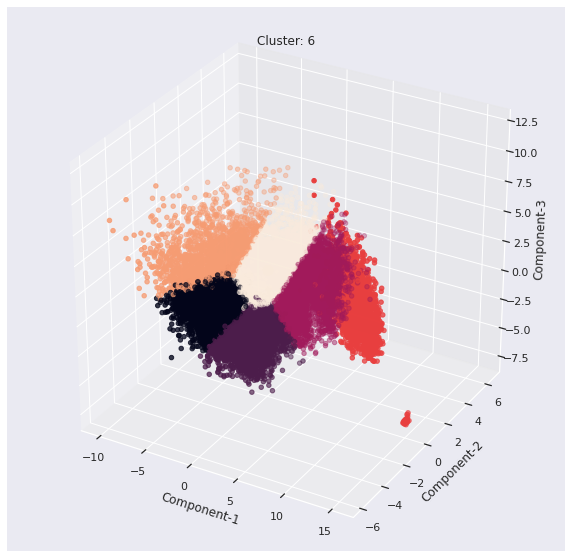

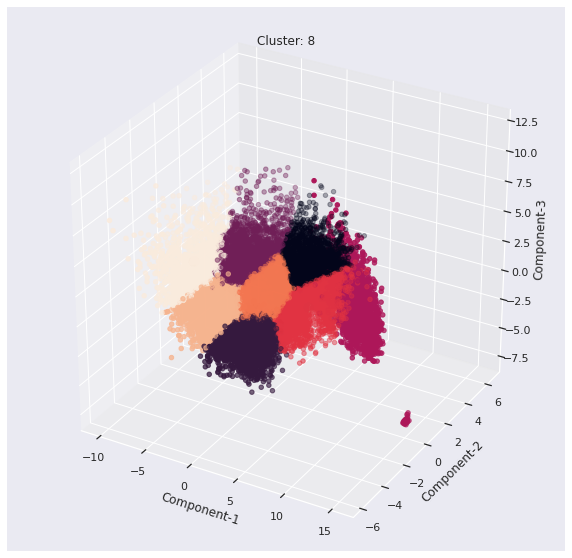

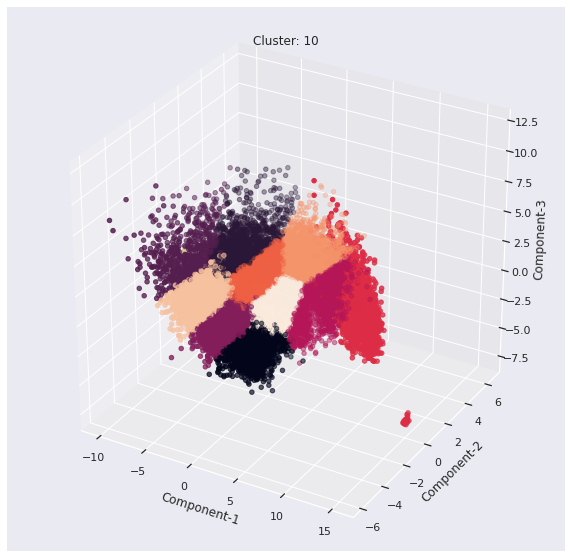

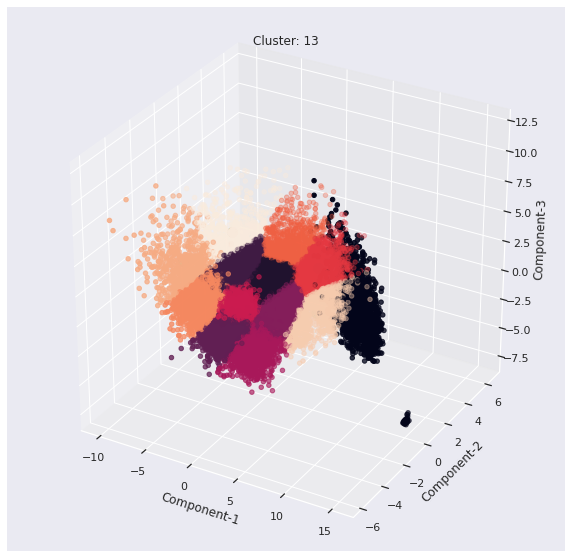

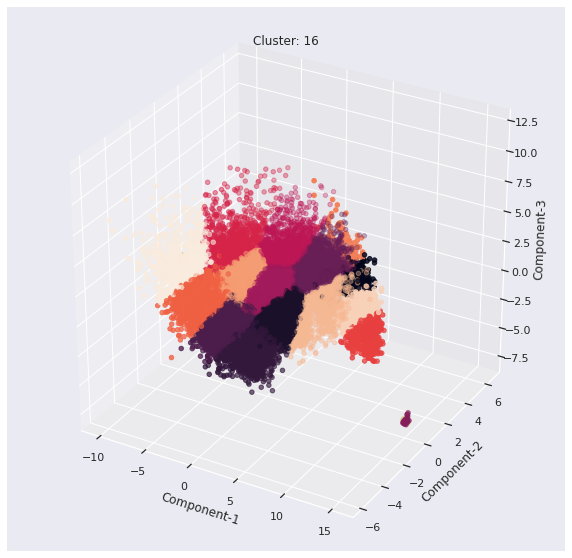

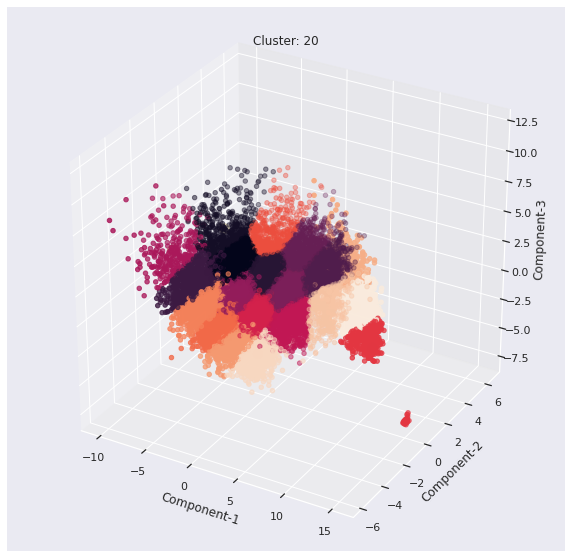

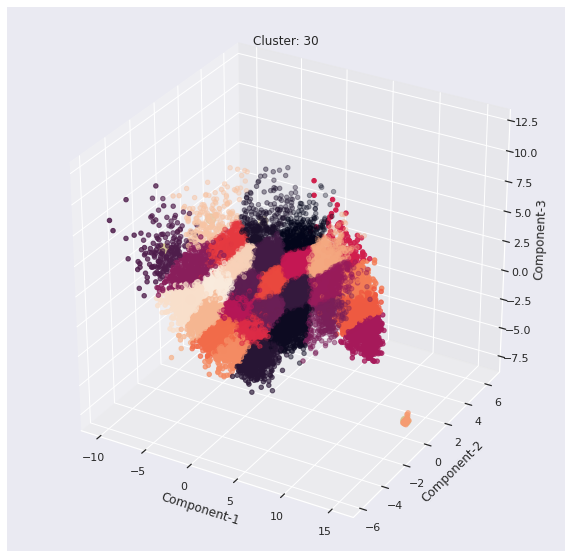

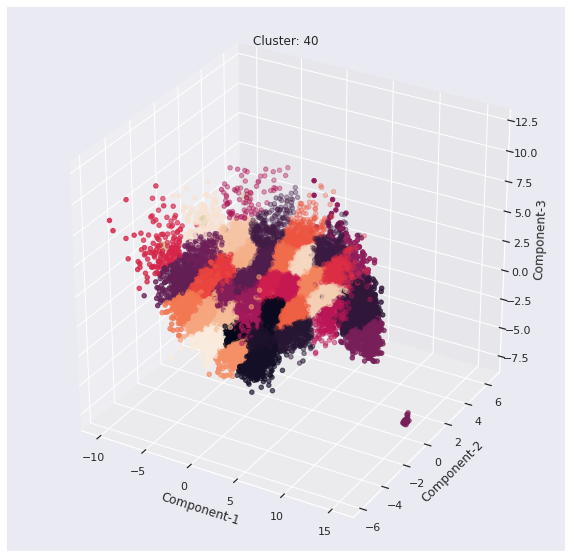

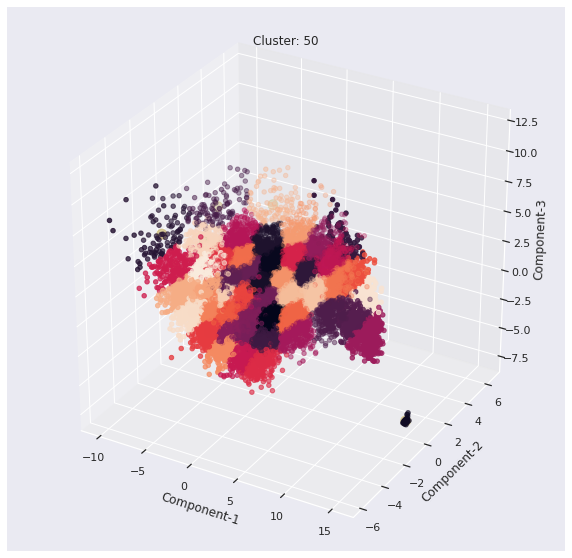

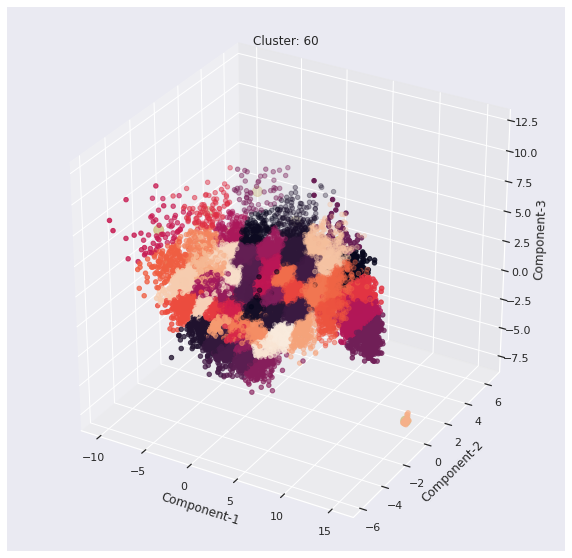

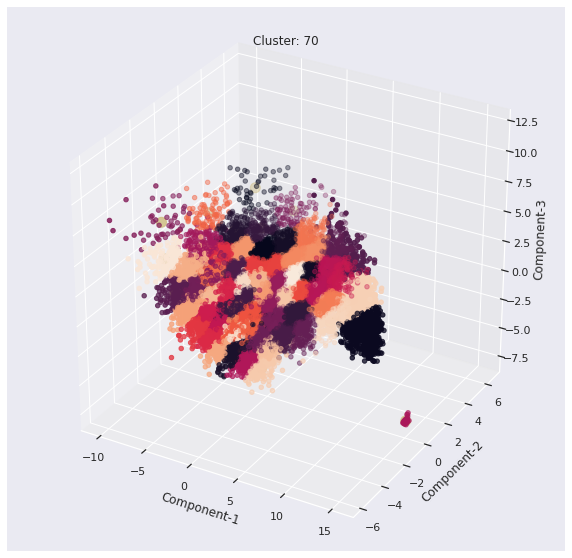

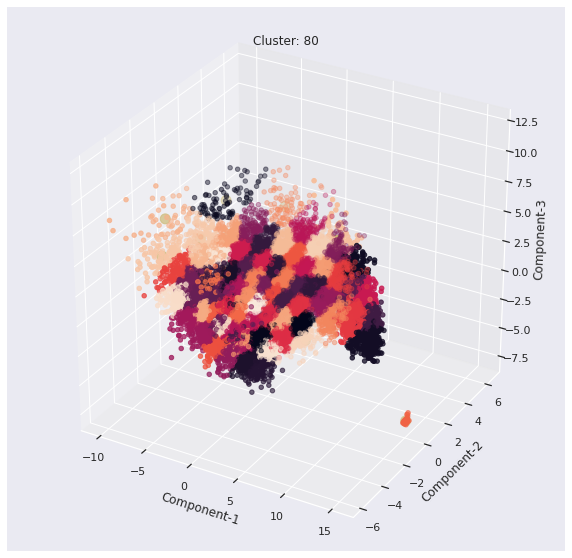

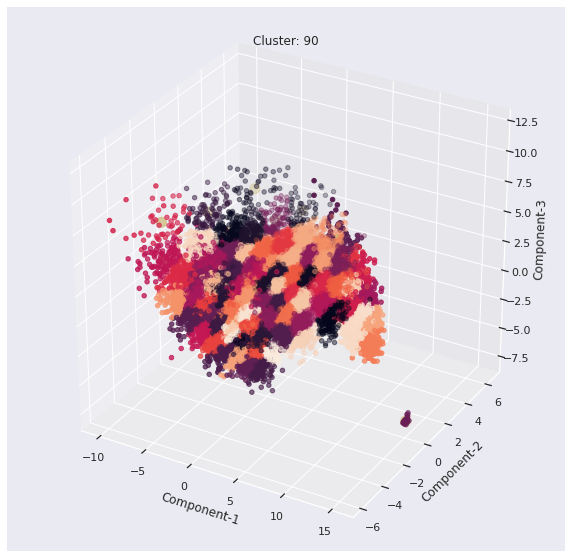

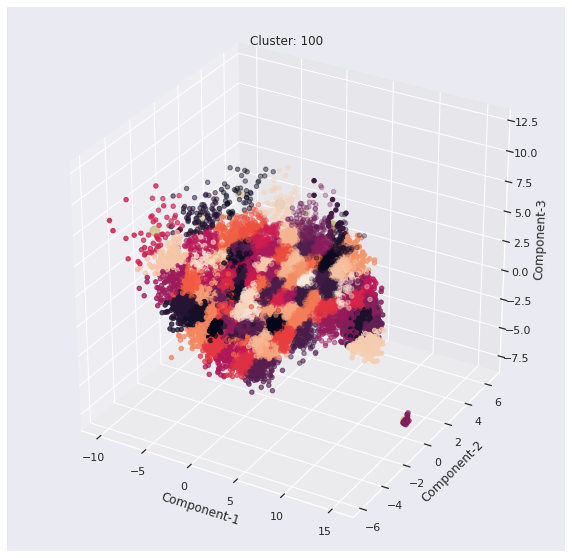

In [ ]:
for j in range(len(K)):
  ax = plt.figure(figsize=(10,10)).gca(projection = '3d')
  colors = [int(i) for i in models[j].labels_]
  ax.scatter(pca_3d[:, 0], pca_3d[:, 1], pca_3d[:,2], c = colors)
  ax.scatter(models[j].centroids_[:, 0], models[j].centroids_[:, 1], models[j].centroids_[:,2],c='y',s=100)
  ax.set_xlabel('Component-1')
  ax.set_ylabel('Component-2')
  ax.set_zlabel('Component-3')
  plt.title('Cluster: '+str(K[j]))
  plt.show()

### Eucliedian Distances
- We use Eucliedian distances to measure the inter cluster similarity.

In [58]:
from sklearn.metrics.pairwise import euclidean_distances,cosine_distances

In [83]:
kmeans = KMeans()
kmeans.fit(X,50)

Text(0.5, 1.0, 'Euclidiean Distances')

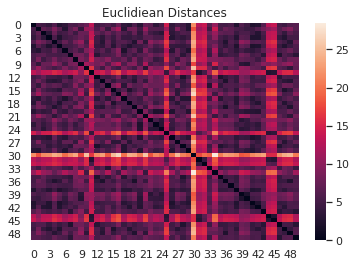

In [84]:
ax = sns.heatmap(euclidean_distances(kmeans.centroids_))
plt.title("Euclidiean Distances")

Observations:
- We see that euclidean distances is ~17.5 between classes.